In [101]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler as stscale
from sklearn.preprocessing import Imputer
import scipy.stats as stats
from scipy import stats, linalg
from matplotlib.pyplot import cm
import diff_classifier.aws as aws


# Importing and Scaling Data

In [2]:
filename = 'features_100nm_XY01.csv'
folder = 'Gel_Studies/08_14_18_gel_validation'
aws.download_s3('{}/{}'.format(folder, filename), filename, bucket_name='ccurtis.data')

In [5]:
#nonnum = ['Litter', 'Ferret', 'Number', 'Sex', 'Rx', 'Experiment', 'Trial']

fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
#fstats_num = fstats.drop(nonnum, axis=1)
fstats_raw = fstats.as_matrix()
fstats

,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,frames,kurtosis,straightness,trappedness
0,1.069075,1.694370e-01,1.461253,0.0,401.022851,1810.881539,1.303501e-01,0.418714,0.462892,0.069780,0.057406,0.003013,0.064612,3.583411,309.0,5.556251,0.003615,-0.209711
1,2.016120,1.044088e-03,0.117418,1.0,140.418992,1792.617869,1.127662e+00,0.089522,0.734443,0.011790,0.053553,0.090041,0.503998,2.990544,158.0,6.045452,0.027049,-0.210882
2,1.409900,8.033302e-02,0.718363,2.0,118.282543,1734.505360,5.740683e-03,0.358553,0.500943,0.056863,0.086495,0.000402,0.290730,4.665504,651.0,3.161033,0.000900,-0.200905
3,2.453172,1.254343e-05,-0.015026,3.0,339.390790,1854.683439,4.269982e+00,0.980412,0.070324,0.473574,0.024890,1.305194,0.592364,1.524663,48.0,4.537497,0.235522,-0.219631
4,1.735138,1.320879e-01,-0.018252,4.0,134.302893,1556.918251,2.173253e+00,0.822831,0.220709,0.227870,0.037706,1.545004,0.423677,1.669052,35.0,3.244494,0.232206,-0.215711
5,1.233737,8.709942e-02,0.563869,5.0,500.275593,1604.234412,1.286278e-02,0.238094,0.586628,0.034529,0.065301,0.001104,0.189454,4.229204,651.0,4.111432,0.001480,-0.207314
6,2.196792,6.963190e+00,-0.002210,6.0,496.846737,1953.019251,7.997851e-01,0.912896,0.150928,0.317621,0.042980,0.727372,0.544791,1.499163,25.0,1.466223,0.215573,-0.214102
7,2.488935,4.302590e+01,0.097047,7.0,498.161808,1879.269602,2.088455e-01,0.936934,0.127609,0.355644,0.019114,0.435478,0.598222,1.549244,44.0,1.516588,0.113412,-0.221402
8,1.203546,7.638828e+00,0.047208,8.0,314.243433,1813.063148,4.992334e-01,0.052114,0.792645,0.006712,0.079992,0.453622,0.169122,1.867846,28.0,2.905028,0.153606,-0.202868
9,1.408389,1.968507e+01,1.312340,9.0,107.653218,1850.636599,6.701193e-07,0.611343,0.349868,0.123278,0.068917,0.018241,0.289969,2.045822,39.0,1.692851,0.024949,-0.206218


# Imputation of missing values

In [6]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(fstats_raw)
fstats_clean = imp.transform(fstats_raw)

In [7]:
scaler = stscale()
scaler.fit(fstats_clean)
fstats_scaled = scaler.transform(fstats_clean)

# Bartlett Test

In [8]:
fstats_list = []
for num in range(0, fstats_scaled.shape[0]):
    fstats_list.append(fstats_scaled[num, :])
    
stats.bartlett(*fstats_list)

BartlettResult(statistic=27096.064300844027, pvalue=0.0)

We accept the null hypothesis that all input samples are from populations with equal variances.

# Kaiser-Meyer-Olkin (KMO) Measure

* 0.00 to 0.49 unacceptable.
* 0.50 to 0.59 miserable.
* 0.60 to 0.69 mediocre.
* 0.70 to 0.79 middling.
* 0.80 to 0.89 meritorious.
* 0.90 to 1.00 marvelous.

In [11]:
#Correlation matrix and the partial covariance matrix.
corrmatrix = np.corrcoef(fstats_scaled.transpose())
pcorr = partial_corr(fstats_scaled)

#Calculation of the KMO statistic
matrix = corrmatrix*corrmatrix
rows = matrix.shape[0]
cols = matrix.shape[1]
rij = 0
uij = 0
for row in range(0, rows):
    for col in range(0, cols):
        if not row == col:
            rij = rij + matrix[row, col]
            uij = uij + pcorr[row, col]

mo = rij/(rij+uij)
print(mo)

0.938878025868


In [86]:
fstats.shape

(5657, 18)

We got middling results with our sampling. Will proceed regardless.

# PCA Analysis

In [ ]:
# pca1 = pca(n_components=5)
# pca1.fit(fstats_raw)

# print(pca1.explained_variance_ratio_) 
# print(pca1.singular_values_)  

In [97]:
def pca_analysis(dataset, dropcols=[], imputenans=True, scale=True, n_components=5):
    """
    Performs a primary component analysis on an input dataset
    
    Parameters
    ----------
    dataset : pandas dataframe of shape (n, p)
        Input dataset with n samples and p features
    dropcols : list
        Columns to exclude from pca analysis. At a minimum, user must exclude
        non-numeric columns.
    imputenans : boolean
        If True, impute NaN values as column means.
    scale : boolean
        If True, columns will be scaled to a mean of zero and a standard deviation of 1.
    n_components : integer
        Desired number of components in principle component analysis.
    
    Returns
    -------
    dataset_scaled : numpy array of shape (n, p)
        Scaled dataset with n samples and p features
    dataset_pca : Pandas dataframe of shape (n, n_components)
        Output array of n_component features of each original sample
    dataset_final : Pandas dataframe of shape (n, p+n_components)
        Output array with principle components append to original array.
    prcs : Pandas dataframe of shape (5, n_components)
        Output array displaying the top 5 features contributing to each
        principle component.
    prim_vals : Dictionary of lists
        Output dictionary of of the pca scores for the top 5 features
        contributing to each principle component.
    components : Pandas dataframe of shape (p, n_components)
        Raw pca scores.
        
    Examples
    --------
    
    """
    
    dataset_num = dataset.drop(dropcols, axis=1)
    dataset_raw = dataset.as_matrix()
    
    if imputenans:
        imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
        imp.fit(dataset_raw)
        dataset_clean = imp.transform(dataset_raw)
    else:
        dataset_clean = dataset_raw
        
    if scale:
        scaler = stscale()
        scaler.fit(dataset_clean)
        dataset_scaled = scaler.transform(dataset_clean)
    else:
        dataset_scaled = dataset_clean
    
    pca1 = pca(n_components=n_components)
    pca1.fit(dataset_scaled)
    
    #Cumulative explained variance ratio
    x = 0
    explained_v = pca1.explained_variance_ratio_
    print('Cumulative explained variance:')
    for i in range(0, n_components):
        x = x + explained_v[i]
        print('{} component: {}'.format(i, x))
    
    prim_comps = {}
    prim_vals = {}
    comps = pca1.components_
    components = pd.DataFrame(comps.transpose())

    for num in range(0, n_components):
        highest = np.abs(components[num]).as_matrix().argsort()[-5:][::-1]
        pels = []
        prim_vals[num] = components[num].as_matrix()[highest]
        for col in highest:
            pels.append(dataset.columns[col])
        prim_comps[num] = pels
    
    #Main contributors to each primary component
    prcs = pd.DataFrame.from_dict(prim_comps)
    
    dataset_pca = pd.DataFrame(pca1.transform(dataset_scaled))
    dataset_final = pd.concat([dataset, dataset_pca], axis=1)
    
    return dataset_scaled, dataset_pca, dataset_final, prcs, prim_vals, components

In [98]:
dataset_scaled, dataset_pca, dataset_final, prcs, prim_vals, components = pca_analysis(fstats)

Cumulative explained variance:
0 component: 0.3909872737986918
1 component: 0.5151403377092956
2 component: 0.6174715176622152
3 component: 0.718821133513384
4 component: 0.8026164055566627


In [92]:
dataset_scaled

array([[-0.77844035, -1.73174466, -1.10364979, ...,  0.36460943,
        -1.38588293, -0.13955749],
       [-0.7959998 , -1.7311323 , -1.5614351 , ...,  0.44471252,
        -1.1763862 , -0.22090346],
       [-0.78773182, -1.73051994, -1.60032072, ..., -0.02758981,
        -1.41015035,  0.4720861 ],
       ..., 
       [-0.30284292,  1.73051994,  0.96901866, ..., -0.28669104,
         0.57996151,  0.08175978],
       [-0.67485971,  1.7311323 ,  1.55605502, ..., -0.17081336,
         1.86635145, -0.45827718],
       [-0.00273649,  1.73174466,  1.70523595, ..., -0.13715034,
         1.77518461, -0.65532612]])

In [21]:
pca1 = pca(n_components=5)
pca1.fit(fstats_scaled)

print('Largest eigenvalues of covariance matrix: {}'.format(pca1.explained_variance_))
print('Percent explained variance: {}'.format(pca1.explained_variance_ratio_)) 
#print(pca1.singular_values_)  

Largest eigenvalues of covariance matrix: [ 6.25690243  1.98680023  1.63758836  1.62188056  1.3409614 ]
Percent explained variance: [ 0.39098727  0.12415306  0.10233118  0.10134962  0.08379527]


In [22]:
x = 0
for i in range(0, 5):
    x = x + pca1.explained_variance_ratio_[i]
    print('{} component: {}'.format(i, x))

0 component: 0.390987273798692
1 component: 0.5151403377092957
2 component: 0.6174715176622154
3 component: 0.7188211335133837
4 component: 0.8026164055566625


We picked components that met the following criteria:

* Eigenvalues greater than 1
* Percent explained variance cutoff of 80%

This gave the first twenty-one components.

In [35]:
primary = 4
comps = pca1.components_
components = pd.DataFrame(comps.transpose())
highest = np.abs(components[primary].as_matrix()).argsort()[-5:][::-1]
highest

array([10,  8, 15, 11,  0])

In [29]:
components

,0,1,2,3,4
0,-0.009607,0.025974,-0.245641,0.592423,-0.330534
1,0.001019,-0.700391,0.047117,0.055467,0.003544
2,0.014506,-0.206454,0.020082,0.060967,-0.087254
3,0.003845,0.674283,-0.054729,-0.042144,-0.032533
4,0.244356,-0.019129,0.177550,-0.409496,-0.100801
5,0.345886,0.003548,-0.134640,0.181001,0.290104
6,-0.347262,-0.005114,0.136272,-0.173565,-0.294635
7,0.343697,0.005721,-0.086830,0.110875,0.325288
8,-0.294201,-0.042455,-0.329432,-0.209035,0.342011
9,0.303958,-0.022525,0.072164,-0.350295,-0.101445


In [37]:
components.shape

(16, 5)

In [39]:
prim_comps = {}
prim_vals = {}
comps = pca1.components_
components = pd.DataFrame(comps.transpose())
for num in range(0, 5):
    highest = np.abs(components[num]).as_matrix().argsort()[-5:][::-1]
    pels = []
    prim_vals[num] = components[num].as_matrix()[highest]
    for col in highest:
        pels.append(fstats.columns[col])
    prim_comps[num] = pels
    
prcs = pd.DataFrame.from_dict(prim_comps)

In [40]:
prcs

,0,1,2,3,4
0,alpha,D_fit,elongation,AR,boundedness
1,Y,Track_ID,fractal_dim,X,asymmetry2
2,asymmetry1,MSD_ratio,kurtosis,frames,kurtosis
3,efficiency,elongation,asymmetry2,asymmetry3,efficiency
4,boundedness,fractal_dim,AR,asymmetry2,AR


In [41]:
primary = 0
prcs[primary]

0          alpha
1              Y
2     asymmetry1
3     efficiency
4    boundedness
Name: 0, dtype: object

In [42]:
prim_vals[1]

array([-0.70039125,  0.67428324, -0.20645441,  0.05541413,  0.04607054])

In [43]:
for comp in prim_vals:
    print(prim_vals[comp])

[-0.34726179  0.34588593  0.34369653 -0.32076988  0.31814934]
[-0.70039125  0.67428324 -0.20645441  0.05541413  0.04607054]
[ 0.61885827  0.47455843 -0.3297618  -0.32943206 -0.24564129]
[ 0.59242349 -0.40949633 -0.35909279 -0.35029484 -0.20903455]
[ 0.36477326  0.34201119  0.33986225  0.3354321  -0.33053371]


In [ ]:
for num in prcs:
    print(prcs[num])

In [44]:
fstats_pca = pd.DataFrame(pca1.transform(fstats_scaled))

In [45]:
fstats_avg = np.mean(fstats_pca, axis=0)

In [ ]:
fstats_num.columns

In [49]:
fstats_final = pd.concat([fstats, fstats_pca], axis=1)

In [51]:
fstats_final

,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,...,fractal_dim,frames,kurtosis,straightness,trappedness,0,1,2,3,4
0,1.069075,1.694370e-01,1.461253,0.0,401.022851,1810.881539,1.303501e-01,0.418714,0.462892,0.069780,...,3.583411,309.0,5.556251,0.003615,-0.209711,-3.389749,2.557704,2.465527,0.169301,0.654709
1,2.016120,1.044088e-03,0.117418,1.0,140.418992,1792.617869,1.127662e+00,0.089522,0.734443,0.011790,...,2.990544,158.0,6.045452,0.027049,-0.210882,-2.765056,2.533379,1.974634,-0.761811,-0.115859
2,1.409900,8.033302e-02,0.718363,2.0,118.282543,1734.505360,5.740683e-03,0.358553,0.500943,0.056863,...,4.665504,651.0,3.161033,0.000900,-0.200905,-4.541245,2.730291,4.333719,0.279048,2.544382
3,2.453172,1.254343e-05,-0.015026,3.0,339.390790,1854.683439,4.269982e+00,0.980412,0.070324,0.473574,...,1.524663,48.0,4.537497,0.235522,-0.219631,3.576508,2.367467,0.743571,-1.617635,0.495780
4,1.735138,1.320879e-01,-0.018252,4.0,134.302893,1556.918251,2.173253e+00,0.822831,0.220709,0.227870,...,1.669052,35.0,3.244494,0.232206,-0.215711,1.623347,2.069272,0.351484,-1.379839,-0.216981
5,1.233737,8.709942e-02,0.563869,5.0,500.275593,1604.234412,1.286278e-02,0.238094,0.586628,0.034529,...,4.229204,651.0,4.111432,0.001480,-0.207314,-4.525646,2.462514,4.738372,0.376971,1.520498
6,2.196792,6.963190e+00,-0.002210,6.0,496.846737,1953.019251,7.997851e-01,0.912896,0.150928,0.317621,...,1.499163,25.0,1.466223,0.215573,-0.214102,1.581764,2.457381,-0.638886,0.191136,0.215798
7,2.488935,4.302590e+01,0.097047,7.0,498.161808,1879.269602,2.088455e-01,0.936934,0.127609,0.355644,...,1.549244,44.0,1.516588,0.113412,-0.221402,1.481075,2.582383,-1.244076,3.450545,-0.839682
8,1.203546,7.638828e+00,0.047208,8.0,314.243433,1813.063148,4.992334e-01,0.052114,0.792645,0.006712,...,1.867846,28.0,2.905028,0.153606,-0.202868,-2.729812,2.283232,-0.002754,-1.122656,-1.869024
9,1.408389,1.968507e+01,1.312340,9.0,107.653218,1850.636599,6.701193e-07,0.611343,0.349868,0.123278,...,2.045822,39.0,1.692851,0.024949,-0.206218,-1.542458,2.548959,-0.844297,1.303523,-0.455720


In [84]:
test = np.exp(np.nanmean(np.log(fstats_final[fstats_final['alpha']>1].as_matrix()), axis=0))[-5:]
test1 = np.exp(np.nanmean(np.log(fstats_final[fstats_final['alpha']<1].as_matrix()), axis=0))[-5:]

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


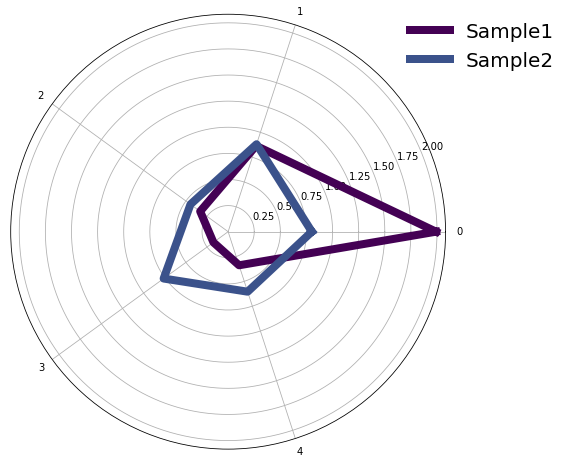

In [128]:
dicti = {}
dicti[0] = test
dicti[1] = test1

plot_pca(dicti, savefig=True)

In [126]:
def plot_pca(datasets, figsize=(8, 8), lwidth=8.0,
             labels = ['Sample1', 'Sample2'], savefig=True, filename='test.png'):
    
    """
    Plots the average output features from a PCA analysis in polar coordinates.
    
    Parameters
    ----------
    datasets : dictionary (keys = n) of numpy arrays of shape p
        Dictionary with n samples and p features to plot.
    figize : list
        Dimensions of output figure e.g. (8, 8)
    lwidth : float
        Width of plotted lines in figure
    labels : list of string
        Labels to display in legend.
    savefig : boolean
        If True, saves figure
    filename : string
        Desired output filename
        
    Returns
    -------
    
    """

    fig = plt.figure(figsize=figsize)
    for key in datasets:
        N = datasets[key].shape[0]
    width = (2*np.pi) / N
    color=iter(cm.viridis(np.linspace(0,1,N)))
    
    theta = np.linspace(0.0, 2 * np.pi, N+1, endpoint=True)
    radii = {}
    bars = {}
    
    ax = plt.subplot(111, polar=True)
    counter = 0
    for key in datasets:
        c=next(color)
        radii[key] = np.append(datasets[key], datasets[key][0]) 
        bars[key] = ax.plot(theta, radii[key], linewidth=lwidth, color=c, label=labels[counter])
        counter = counter + 1
    plt.legend(bbox_to_anchor=(0.90, 1), loc=2, borderaxespad=0., frameon=False, fontsize=20)

    # # Use custom colors and opacity
    # for r, bar in zip(radii, bars):
    #     bar.set_facecolor(plt.cm.jet(np.abs(r / 2.5)))
    #     bar.set_alpha(0.8)
    ax.set_xticks(np.pi/180. * np.linspace(0, 360, N, endpoint=False))
    ax.set_xticklabels(list(range(0, N)))
    
    if savefig:
        plt.savefig(filename, bbox_inches='tight')
    
    plt.show()
    
    

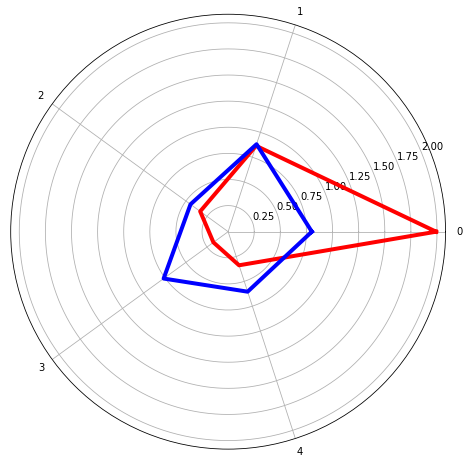

In [85]:
fig = plt.figure(figsize=(8, 8))

N = 5
bottom = 0.5
max_height = 5

theta = np.linspace(0.0, 2 * np.pi, N+1, endpoint=True)
radii = np.append(test, test[0]) #max_height*np.random.rand(N) #Edit this line with values. Should have 21.
radii1 = np.append(test1, test1[0])
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.plot(theta, radii, linewidth=4, color='r')
bars1 = ax.plot(theta, radii1, linewidth=4, color='b')

# # Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.jet(np.abs(r / 2.5)))
#     bar.set_alpha(0.8)
ax.set_xticks(np.pi/180. * np.linspace(0, 360, N, endpoint=False))
ax.set_xticklabels(list(range(0, 21)))
plt.show()

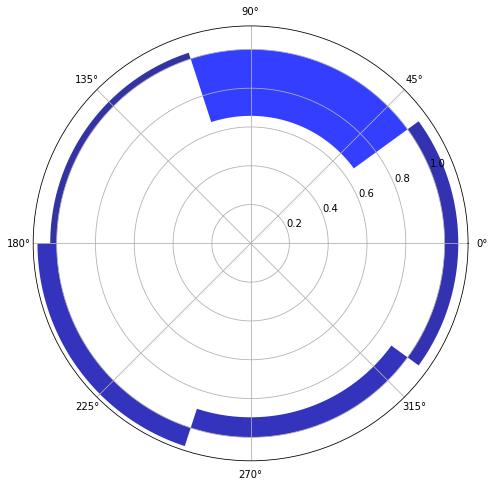

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))

N = 5
bottom = 1
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = test #max_height*np.random.rand(N) #Edit this line with values. Should have 21.
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(np.abs(r / 2.5)))
    bar.set_alpha(0.8)

plt.show()

In [10]:
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.

    Partial Correlation in Python (clone of Matlab's partialcorr)

    This uses the linear regression approach to compute the partial 
    correlation (might be slow for a huge number of variables). The 
    algorithm is detailed here:

        http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression

    Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
    the algorithm can be summarized as

        1) perform a normal linear least-squares regression with X as the target and Z as the predictor
        2) calculate the residuals in Step #1
        3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
        4) calculate the residuals in Step #3
        5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 

        The result is the partial correlation between X and Y while controlling for the effect of Z


    Date: Nov 2014
    Author: Fabian Pedregosa-Izquierdo, f@bianp.net
    Testing: Valentina Borghesani, valentinaborghesani@gmail.com

    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable


    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr